In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from duat.osiris import config, plot, run

If a warning on not found executables was raised, add a cell setting the path to the folder with the executables:
run.set_osiris_path(path.join("path", "to", "osiris", "folder"))

In [3]:
# Create a config file with the defaults and change some parameters
sim=config.ConfigFile(1) # Argument -> dimension
# Parameters can be edited using the python item access notation
sim["time"]["tmax"]=30.0
sim["species_list"][1]["species"]["num_par_x"]=[200]
# Beware the python indexes starting at zero. "1" is the second particle species
sim["species_list"][0]["diag_species"].set_pars(ndump_fac=1, reports="ene")

ene_bins=np.arange(0,0.5,0.02)
sim["species_list"][1]["diag_species"].set_pars(ndump_fac=1, ndump_fac_pha=1, pha_ene_bin="x1_|charge|",
                                    ene_bins=ene_bins, n_ene_bins=len(ene_bins))

In [4]:
#Even if a section was not created, accesing it with the index notation will create it
sim["diag_emf"]["reports"]=["e1","e2","e3"]
sim["diag_emf"]["ndump_fac"]=5

In [5]:
# Check the generated code
print(sim)

node_conf
{
  node_number(1:1) = 1,
  if_periodic(1:1) = .true.,
}

grid
{
  coordinates = "cartesian",
  nx_p(1:1) = 1024,
}

time_step
{
  dt = 0.070000,
  ndump = 10,
}

space
{
  xmin(1:1) = 0.000000,
  xmax(1:1) = 102.400000,
  if_move(1:1) = .false.,
}

time
{
  tmin = 0.000000,
  tmax = 30.000000,
}

emf_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_emf
{
  reports(1:3) = "e1", "e2", "e3",
  ndump_fac = 5,
}

particles
{
  num_species = 2,
}

!---Species configuration
!---Configuration for species 1
species
{
  num_par_max = 2048,
  rqm = -1.000000,
  num_par_x(1:1) = 2,
  vth(1:3) = 0.100000, 0.100000, 0.100000,
  vfl(1:3) = 0.000000, 0.000000, 0.600000,
  den_min = 0.000010,
  num_dgam = 0,
  dgam = 0,
}

profile
{
  fx(1:6, 1) = 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
  
  x(1:6, 1) = 0.000000, 0.999900, 1.000000, 2.000000, 2.001000, 10000.000000,
  
}

spe_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_species
{
  ndump_fac = 1,
  reports = "ene",
}


!---Configur

In [6]:
# A directory for the runs
run_dir = os.path.join(os.path.expanduser("~"), "osiris-run")
print(run_dir)

/home/guillehg/osiris-run


In [7]:
# Sequentially run simulations varying a parameter. Also check for errors, but note they are not always detected
for i in [2, 20, "IAMERROR"]:
    sim["species_list"][1]["species"]["num_par_x"]=[i]
    (error_detected, process,) = run.run_mono(sim, run_dir+str(i), prefix="", blocking=True, clean_dir=True)
    print(error_detected)

True
True
False


Error detected while launching /home/guillehg/osiris-runIAMERROR.
Check out.txt there for more information or re-run in console.


In [8]:
# Automatic plots of everything in a simulation
with plt.style.context(['ggplot']):
    plot.auto_process(run_dir+"2", file_format="mp4", verbose=True, kwargs_1d=dict(dpi=300))

Generating file(s) for /home/guillehg/osiris-run2/MS/PHA/x1_|charge|_bin_ene/species_2
- Dimensions: (1, 26, 43)
- Generating: /home/guillehg/osiris-run2/plot/PHA_x1_|charge|_bin_ene_species_2_0.mp4
- Generating: /home/guillehg/osiris-run2/plot/PHA_x1_|charge|_bin_ene_species_2_13.mp4
- Generating: /home/guillehg/osiris-run2/plot/PHA_x1_|charge|_bin_ene_species_2_25.mp4
Generating file(s) for /home/guillehg/osiris-run2/MS/FLD/e2
- Dimensions: (1, 1, 9)
- Generating: /home/guillehg/osiris-run2/plot/FLD_e2.mp4
Generating file(s) for /home/guillehg/osiris-run2/MS/FLD/e1
- Dimensions: (1, 1, 9)
- Generating: /home/guillehg/osiris-run2/plot/FLD_e1.mp4
Generating file(s) for /home/guillehg/osiris-run2/MS/FLD/e3
- Dimensions: (1, 1, 9)
- Generating: /home/guillehg/osiris-run2/plot/FLD_e3.mp4
Generating file(s) for /home/guillehg/osiris-run2/MS/DENSITY/species_1/ene
- Dimensions: (1, 1, 43)
- Generating: /home/guillehg/osiris-run2/plot/DENSITY_species_1_ene.mp4


In [9]:
# A different kind of plot, across datasets
plot.time_dataset_animation(os.path.join(run_dir+"2", "MS/PHA/x1_|charge|_bin_ene/species_2"),
                    output_path=os.path.join(run_dir+"2","plot","test.mp4") ,position=5)

/usr/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


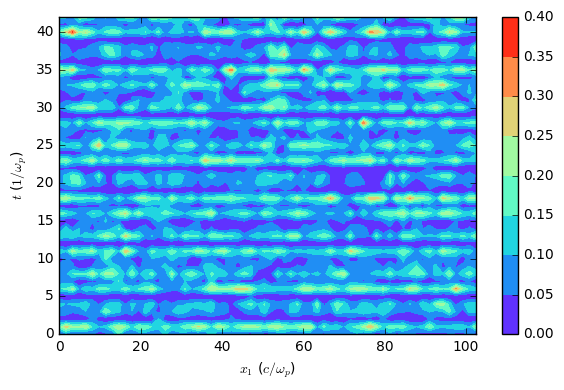

In [10]:
plot.time_1d_colormap(os.path.join(run_dir+"2", "MS/PHA/x1_|charge|_bin_ene/species_2"),dataset=5,cmap="rainbow")

In [11]:
plot.time_1d_colormap(os.path.join(run_dir+"2", "MS/FLD/e1"),
                      output_path=os.path.join(run_dir+"2","plot","test.png"),
                      cmap="rainbow")

In [12]:
# Some imports for quick and dirty debug
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import re